In [1]:
import os
import cv2 # OpenCV ou cv2 para tratamento de imagens;
import numpy as np # Numpy para trabalharmos com matrizes n-dimensionais
from keras.models import Sequential # Importando modelo sequencial
from keras.layers.convolutional import Conv2D, MaxPooling2D # Camada de convolução e max pooling
from keras.layers.core import Activation, Flatten, Dense # Camada da função de ativação, flatten, entre outros
from keras.layers import Rescaling # Camada de escalonamento
from keras.optimizers import Adam # optimizador Adam
from keras.callbacks import ModelCheckpoint # Classe utilizada para acompanhamento durante o treinamento onde definimos os atributos que serão considerados para avaliação
from tensorflow.data import AUTOTUNE
from tensorflow.keras.utils import image_dataset_from_directory # Função que carrega o dataset de um diretório
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping




In [2]:
def create_lenet(input_shape):
    """
    Cria uma mini arquitetura lenet

    Args:
        input_shape: Uma lista de três valores inteiros que definem a forma de\
                entrada da rede. Exemplo: [100, 100, 3]

    Returns:
        Um modelo sequencial, seguindo a arquitetura lenet
    """
    # Definimos que estamos criando um modelo sequencial
    model = Sequential()

    # Primeira camada do modelo:
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))

    # Segunda camada do modelo:
    model.add(Conv2D(70, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))

    # Primeira camada fully connected
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # Classificador softmax
    model.add(Dense(classes))
    model.add(Activation("sigmoid"))
    return model

In [4]:
if __name__ == "__main__":
    train_path = "D:\projetos\diversos\cromai\experimento3\cats_and_dogs" # Adicione aqui o caminho para chegar no diretório que contém as imagens de treino na sua maquina
    models_path = "models" # Defina aqui onde serão salvos os modelos na sua maquina
    width = 100 # Tamanho da largura da janela que será utilizada pelo modelo
    height = 100 # Tamanho da altura da janela que será utilizada pelo modelo
    depth = 3 # Profundidade das janelas utilizadas pelo modelo, caso seja RGB use 3, caso escala de cinza 1
    classes = 2 # Quantidade de classes que o modelo utilizará
    epochs = 20 # Quantidade de épocas (a quantidade de iterações que o modelo realizará durante o treinamento)
    init_lr = 1e-3 # Taxa de aprendizado a ser utilizado pelo optimizador
    batch_size = 60 # Tamanho dos lotes utilizados por cada epoca
    input_shape = (height, width, depth) # entrada do modelo
    save_model = os.path.join(models_path, "lenet-{epoch:02d}-{accuracy:.3f}-{val_accuracy:.3f}.model")
    color_mode = {1:"grayscale", 3: "rgb"} # Usado para selecionar o colormode em função da variável depth

    os.makedirs(models_path, exist_ok=True)

    train_ds = image_dataset_from_directory(
                            train_path,
                            seed=123,
                            label_mode='categorical',
                            validation_split=0.2,
                            subset="training",
                            color_mode=color_mode[depth],
                            image_size=(height, width),
                            batch_size=batch_size
    )

    val_ds = image_dataset_from_directory(
                            train_path,
                            seed=123,
                            label_mode='categorical',
                            validation_split=0.2,
                            subset="validation",
                            color_mode=color_mode[depth],
                            image_size=(height, width),
                            batch_size=batch_size
    )

    rescaling_layer = Rescaling(1./255)
    # pré-busca em buffer para que você possa produzir dados do disco sem que a E/S se torne um bloqueio
    train_ds = train_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(lambda x, y: (rescaling_layer(x), y), num_parallel_calls=AUTOTUNE)

    model = create_lenet(input_shape)

    opt = Adam(lr=init_lr)

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    model.summary()

    print("\n training network")




Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 20)      1520      
                                                                 
 activation_4 (Activation)   (None, 100, 100, 20)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 20)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 20)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 70)        35070     
                                     

In [7]:

checkpoint1 = ModelCheckpoint(save_model, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint2 = ModelCheckpoint(save_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


callbacks_list = [checkpoint1,checkpoint2]





In [8]:
H = model.fit(train_ds,
        validation_data=val_ds,
        epochs=epochs,
        verbose=1,
        callbacks=callbacks_list
)

Epoch 1/20


334/334 [==============================] - ETA: 0s - loss: 0.2856 - accuracy: 0.8794
Epoch 1: val_loss improved from inf to 0.51876, saving model to models\lenet-01-0.879-0.777.model


INFO:tensorflow:Assets written to: models\lenet-01-0.879-0.777.model\assets


INFO:tensorflow:Assets written to: models\lenet-01-0.879-0.777.model\assets



Epoch 1: val_accuracy improved from -inf to 0.77700, saving model to models\lenet-01-0.879-0.777.model


INFO:tensorflow:Assets written to: models\lenet-01-0.879-0.777.model\assets


INFO:tensorflow:Assets written to: models\lenet-01-0.879-0.777.model\assets


334/334 [==============================] - 126s 376ms/step - loss: 0.2856 - accuracy: 0.8794 - val_loss: 0.5188 - val_accuracy: 0.7770
Epoch 2/20
334/334 [==============================] - ETA: 0s - loss: 0.2030 - accuracy: 0.9186
Epoch 2: val_loss did not improve from 0.51876

Epoch 2: val_accuracy improved from 0.77700 to 0.78600, saving model to models\lenet-02-0.919-0.786.model


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.786.model\assets


INFO:tensorflow:Assets written to: models\lenet-02-0.919-0.786.model\assets


334/334 [==============================] - 122s 365ms/step - loss: 0.2030 - accuracy: 0.9186 - val_loss: 0.5350 - val_accuracy: 0.7860
Epoch 3/20
334/334 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9447
Epoch 3: val_loss did not improve from 0.51876

Epoch 3: val_accuracy did not improve from 0.78600
334/334 [==============================] - 118s 354ms/step - loss: 0.1447 - accuracy: 0.9447 - val_loss: 0.6245 - val_accuracy: 0.7842
Epoch 4/20
334/334 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9600
Epoch 4: val_loss did not improve from 0.51876

Epoch 4: val_accuracy did not improve from 0.78600
334/334 [==============================] - 120s 358ms/step - loss: 0.1094 - accuracy: 0.9600 - val_loss: 0.6555 - val_accuracy: 0.7846
Epoch 5/20
334/334 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9721
Epoch 5: val_loss did not improve from 0.51876

Epoch 5: val_accuracy improved from 0.78600 to 0.79040, savin

INFO:tensorflow:Assets written to: models\lenet-05-0.972-0.790.model\assets


INFO:tensorflow:Assets written to: models\lenet-05-0.972-0.790.model\assets


334/334 [==============================] - 125s 374ms/step - loss: 0.0802 - accuracy: 0.9721 - val_loss: 0.7854 - val_accuracy: 0.7904
Epoch 6/20
334/334 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.9788
Epoch 6: val_loss did not improve from 0.51876

Epoch 6: val_accuracy did not improve from 0.79040
334/334 [==============================] - 118s 353ms/step - loss: 0.0653 - accuracy: 0.9788 - val_loss: 0.7993 - val_accuracy: 0.7836
Epoch 7/20
334/334 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9834
Epoch 7: val_loss did not improve from 0.51876

Epoch 7: val_accuracy improved from 0.79040 to 0.79080, saving model to models\lenet-07-0.983-0.791.model


INFO:tensorflow:Assets written to: models\lenet-07-0.983-0.791.model\assets


INFO:tensorflow:Assets written to: models\lenet-07-0.983-0.791.model\assets


334/334 [==============================] - 122s 363ms/step - loss: 0.0486 - accuracy: 0.9834 - val_loss: 0.8094 - val_accuracy: 0.7908
Epoch 8/20
334/334 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9852
Epoch 8: val_loss did not improve from 0.51876

Epoch 8: val_accuracy did not improve from 0.79080
334/334 [==============================] - 118s 353ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.9147 - val_accuracy: 0.7750
Epoch 9/20
334/334 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9844
Epoch 9: val_loss did not improve from 0.51876

Epoch 9: val_accuracy did not improve from 0.79080
334/334 [==============================] - 118s 353ms/step - loss: 0.0471 - accuracy: 0.9844 - val_loss: 0.9353 - val_accuracy: 0.7876
Epoch 10/20
334/334 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9897
Epoch 10: val_loss did not improve from 0.51876

Epoch 10: val_accuracy did not improve from 0.79080
334/334

INFO:tensorflow:Assets written to: models\lenet-15-0.994-0.797.model\assets


INFO:tensorflow:Assets written to: models\lenet-15-0.994-0.797.model\assets


334/334 [==============================] - 122s 365ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 1.1325 - val_accuracy: 0.7972
Epoch 16/20
334/334 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9923
Epoch 16: val_loss did not improve from 0.51876

Epoch 16: val_accuracy did not improve from 0.79720
334/334 [==============================] - 120s 357ms/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 1.2033 - val_accuracy: 0.7826
Epoch 17/20
334/334 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9900
Epoch 17: val_loss did not improve from 0.51876

Epoch 17: val_accuracy did not improve from 0.79720
334/334 [==============================] - 120s 358ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 1.2456 - val_accuracy: 0.7660
Epoch 18/20
334/334 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9930
Epoch 18: val_loss did not improve from 0.51876

Epoch 18: val_accuracy did not improve from 0.79720
3

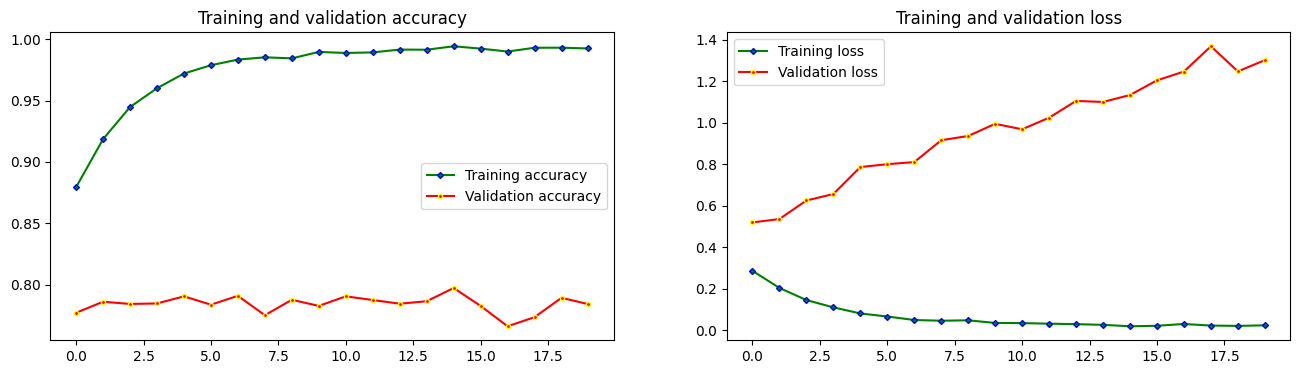

In [9]:
from matplotlib import pyplot as plt
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy', marker='D', mec='b', ms='3')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy', marker='o', mec='yellow', ms='3')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss', marker='D', mec='b', ms='3')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss', marker='o', mec='yellow', ms='3')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(H)

In [14]:
H

In [13]:
observacoes = pd.DataFrame({
    'observacoes': ['1 – Remoção do early stopping.',
                    '2 – Alteração da variavel.'

     
                    ]
})

In [10]:
import pandas as pd
csv_file_path = r'D:\projetos\diversos\cromai\experimento3\history_experimento3_v1.csv'

history_dict = H.history

# Convertendo o dicionário do histórico em um DataFrame pandas
history_df = pd.DataFrame(history_dict)

In [11]:
history_df 

,loss,accuracy,val_loss,val_accuracy
0,0.285578,0.87940,0.518763,0.7770
1,0.203032,0.91855,0.535042,0.7860
2,0.144664,0.94470,0.624456,0.7842
3,0.109401,0.96005,0.655526,0.7846
4,0.080157,0.97205,0.785416,0.7904
5,0.065336,0.97880,0.799347,0.7836
6,0.048557,0.98340,0.809368,0.7908
7,0.045041,0.98525,0.914711,0.7750
8,0.047083,0.98440,0.935321,0.7876
9,0.034337,0.98965,0.993746,0.7826


In [15]:
with open(csv_file_path, 'w') as f:
  observacoes['observacoes'].to_csv(f, sep=';')
  history_df.to_csv(f, sep=';')

In [16]:
validacao_df = history_df[['val_loss', 'val_accuracy']]

print(validacao_df)

    val_loss  val_accuracy
0   0.518763        0.7770
1   0.535042        0.7860
2   0.624456        0.7842
3   0.655526        0.7846
4   0.785416        0.7904
5   0.799347        0.7836
6   0.809368        0.7908
7   0.914711        0.7750
8   0.935321        0.7876
9   0.993746        0.7826
10  0.967412        0.7904
11  1.023310        0.7874
12  1.104225        0.7844
13  1.099092        0.7864
14  1.132477        0.7972
15  1.203292        0.7826
16  1.245621        0.7660
17  1.367462        0.7734
18  1.246233        0.7892
19  1.300786        0.7840


In [17]:
csv_file_path_validacao = r'D:\projetos\diversos\cromai\experimento3\validacao_v1.csv'
with open(csv_file_path_validacao, 'w') as v:
  observacoes['observacoes'].to_csv(v, sep=';')
  validacao_df.to_csv(v, sep=';')